### Table of Contents

### Data analysis (preprocessing, heap's law, zief's law, bigram)

### Word Clouds

### LDA
*  LDA over all years and logistic regression - unigram
*  LDA over 3 time period windows (~2000, ~2010, ~2020)
*  Dynamic Topic modelling

* Logistic Regression

Note
Y variable is 1 = cited above median (4), 0 = anything less than 4

In [1]:
import pickle, re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
import matplotlib.pyplot as plt
import numpy as np
import spacy

# Get the data and check it

In [2]:
unpickled_df = pd.read_pickle("C:/Users/USER/Documents/Python/NLP/extracted_data.pkl")

* Take out the nan values

In [3]:
df = unpickled_df[unpickled_df['description'].notna()]
#df

In [4]:
df['h_index_x']

16      10
17       1
18       3
19       0
20      16
        ..
5106     0
5108     8
5111    15
5113    12
5114     0
Name: h_index_x, Length: 2033, dtype: object

# Corpus warm-up:

* First, make all words in abstract lower cases
* Create the corpus of abstracts

In [5]:
def column_to_lower(df, column):
    """
        Input: df and a corresponding column
        Output: converted dataframe column 
        Function: Converts all strings in a column of a dataframe to lowercases.
    """
    return df[column].str.lower()

df['description'] = column_to_lower(df, 'description')


corpus = df["description"].tolist()

In [6]:
#check how some values look like
corpus[0]

'one of the applications of robotic farmer-assistant platforms equipped with machine vision systems is the evaluation of production yield before harvest without damaging the product. in this situation, farmers receive proper information for harvesting and post-harvesting management to decide about the required human resources, harvesting equipment, storage space, transportation, and product marketing. in this study, a machine vision system on a tracked vehicle was designed and developed for yield estimation of kiwifruit by traveling along the kiwifruit trellis. several features, i.e., intensity histogram, the histogram of oriented gradients, shape context, and local binary pattern, were extracted from the images captured from the plants, and the number of kiwifruits in the images was predicted using the support vector machine (svm). to improve the performance of the svm, its parameters were optimized using evolutionary optimization methods, namely, particle swarm optimization (pso), an

In [7]:
#type(corpus[0])

In [8]:
#len(corpus)
#1028 abstracts

In [9]:
#to count the amount of words in the entire dataset, also repeating
corpus_all = []

for i in range(0,len(corpus)):
    res = re.findall(r'\w+', str(corpus[i]))
    corpus_all.extend(res)
    
#corpus_all

In [10]:
#len(corpus_all)


In [11]:
#type(corpus_all)

In [12]:
#print(corpus_all)

* Create a list all the unique words in the corpus

In [13]:
lister = []
for i in corpus_all:
    if i not in lister:
        lister.append(i)
            
#print(lister)
print("There are", len(lister), "unique words in that list")

There are 15274 unique words in that list


* Tokenize and check the words most frequent in the entire corpus

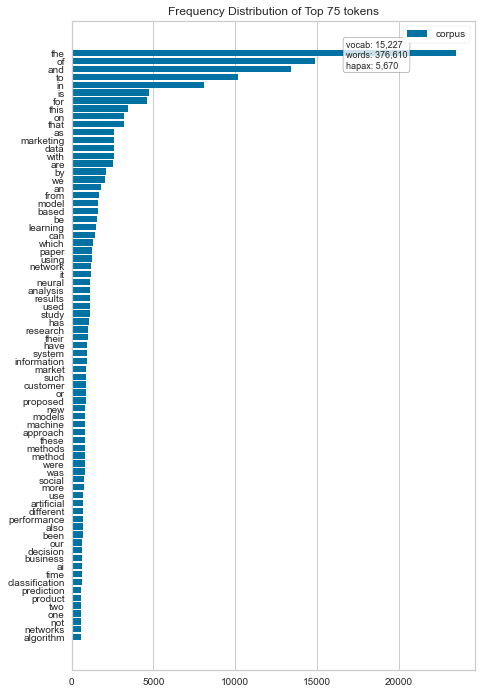

<AxesSubplot:title={'center':'Frequency Distribution of Top 75 tokens'}>

In [14]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=75, size= (520, 860))
visualizer.fit(docs)
visualizer.show()

A function that takes as inputs a visualizer object and the number of words to be plotted and returns the **Zipf's law plot**

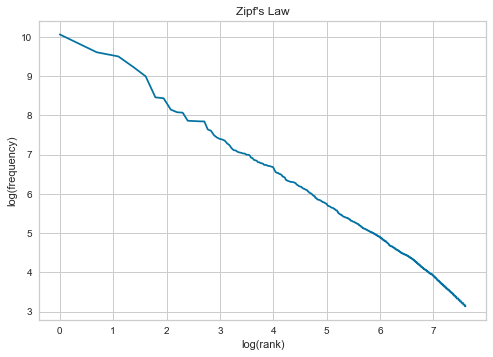

In [15]:
def zipf_law_plot(visualizer_obj, n):
    word_count = pd.DataFrame({"word":visualizer_obj.features,
                               "count":visualizer_obj.freqdist_})
    word_count = word_count.sort_values(by = "count", ascending = False)
    word_count.reset_index(inplace = True, drop = True)
    plt.plot(np.log(np.arange(1,n+1)), np.log(word_count.iloc[:n,1]))
    plt.title("Zipf's Law")
    plt.xlabel("log(rank)")
    plt.ylabel("log(frequency)")

n_words_zipf = 2000
zipf_law_plot(visualizer, n_words_zipf)
plt.show()

### Take out english stopwords and check which are the most used words

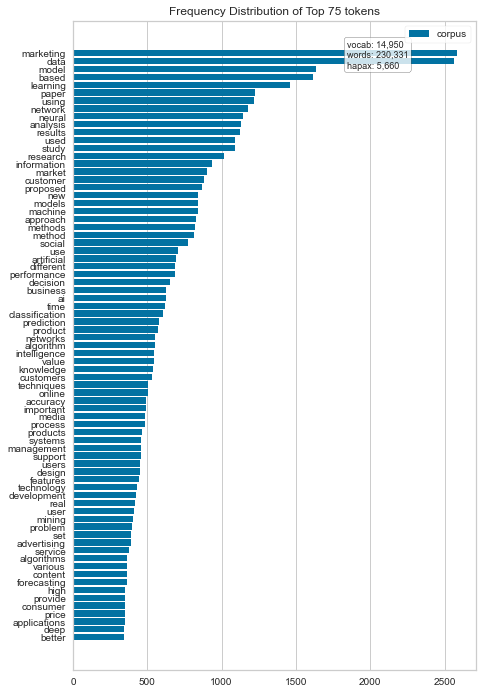

<AxesSubplot:title={'center':'Frequency Distribution of Top 75 tokens'}>

In [16]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=75,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

**Zipf's law plot** excluding English stop words

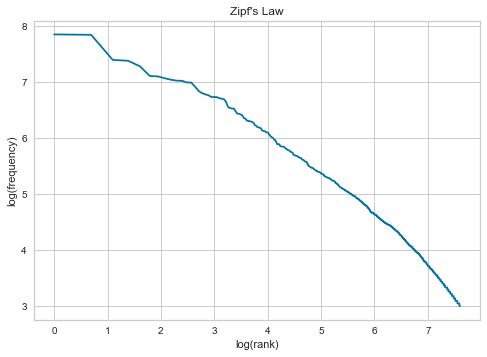

In [17]:
zipf_law_plot(visualizer, n_words_zipf)
plt.show()

In [18]:
#from sklearn.feature_extraction import stop_words


* Check the most popular words only for some years

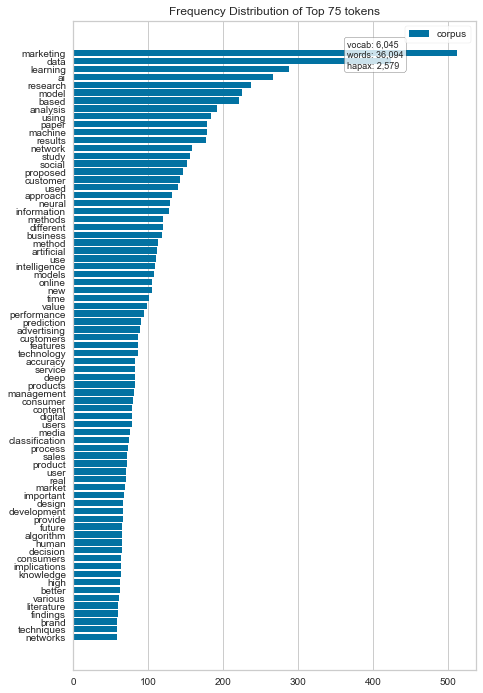

<AxesSubplot:title={'center':'Frequency Distribution of Top 75 tokens'}>

In [19]:
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(corpus[200:500])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=75,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

-----

**Heap's law plot**

*** The plot shows that our corpus follows the heap's law


Text(0, 0.5, 'n of unique words')

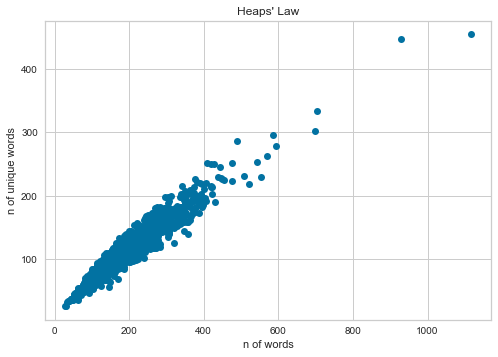

In [20]:
n_words = []
n_unique_words = []

for i in range(0,len(corpus)):
    res = [word.lower() for word in re.findall(r'\w+', corpus[i])]
    n_unique_words.append(len(set(res)))
    n_words.append(len(res))
    
plt.plot(n_words, n_unique_words, "o")
plt.title("Heaps' Law")
plt.xlabel("n of words")
plt.ylabel("n of unique words")

----

### Pre-processing:  Bigram, Lemmatizing & Tokenization

In [21]:
import spacy
spacyen = spacy.load('en_core_web_sm')

In [22]:
from nltk.tokenize import RegexpTokenizer
import gensim
from gensim.utils import simple_preprocess
from wordcloud import STOPWORDS

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
            if word not in STOPWORDS] for doc in texts]

tokenizer = RegexpTokenizer(r'\w+')

for idx in range(len(corpus)):
    corpus[idx] = tokenizer.tokenize(str(corpus[idx]))

corpus2 = [[token for token in doc if not token.isnumeric()] for doc in corpus]
corpus2 = [[token for token in doc if len(token) > 1] for doc in corpus]
corpus2 = remove_stopwords(corpus2)

C:\Users\USER\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [23]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
  
corpus2 = [[lemmatizer.lemmatize(token) for token in doc] for doc in corpus2]

#corpus_all_lower_lemma

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
len(corpus2)

2033

In [25]:
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(corpus2, min_count=20)

for idx in range(len(corpus2)):
    print(idx)
    for token in bigram[corpus2[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            corpus2[idx].append(token)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [26]:
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram = Phrases(bigram[corpus2], min_count = 20)
trigram_mod = gensim.models.phrases.Phraser(trigram)
corpus2 = [trigram_mod[bigram_mod[doc]] for doc in corpus2]


## Divide corpus into sentences

In [27]:
re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', str(corpus[0]))

["['one', 'of', 'the', 'applications', 'of', 'robotic', 'farmer', 'assistant', 'platforms', 'equipped', 'with', 'machine', 'vision', 'systems', 'is', 'the', 'evaluation', 'of', 'production', 'yield', 'before', 'harvest', 'without', 'damaging', 'the', 'product', 'in', 'this', 'situation', 'farmers', 'receive', 'proper', 'information', 'for', 'harvesting', 'and', 'post', 'harvesting', 'management', 'to', 'decide', 'about', 'the', 'required', 'human', 'resources', 'harvesting', 'equipment', 'storage', 'space', 'transportation', 'and', 'product', 'marketing', 'in', 'this', 'study', 'a', 'machine', 'vision', 'system', 'on', 'a', 'tracked', 'vehicle', 'was', 'designed', 'and', 'developed', 'for', 'yield', 'estimation', 'of', 'kiwifruit', 'by', 'traveling', 'along', 'the', 'kiwifruit', 'trellis', 'several', 'features', 'i', 'e', 'intensity', 'histogram', 'the', 'histogram', 'of', 'oriented', 'gradients', 'shape', 'context', 'and', 'local', 'binary', 'pattern', 'were', 'extracted', 'from', 'th

In [28]:
len(re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', str(corpus[0])))

1

In [29]:
corpus_sentences = []

for i in range(0,len(corpus)):
    #split the current abstract into sentences
    sentences = re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', str(corpus[i]))
    #nr of sentences in current abstract
    nr_of_sentences = len(sentences)
    corpus_sentences.append(nr_of_sentences)

In [30]:
df.loc[:,'nr_sentences_abstract']=corpus_sentences

In [31]:
df.nr_sentences_abstract.describe()

count    2033.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: nr_sentences_abstract, dtype: float64

In [32]:
#print(df.nr_sentences_abstract.sum(), "total number of sentences")
#print(df.nr_sentences_abstract.median(), "median")
#print(df.nr_sentences_abstract.describe())

In [33]:
 #print(df.loc[df['nr_sentences_abstract'] == 46]['description'].values)

In [34]:
df.loc[df['nr_sentences_abstract'] == 46]['description']

Series([], Name: description, dtype: object)

In [35]:
#re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', df.loc[1922]["description"])

In [36]:
#We should also extract the keywords maybe

In [37]:
keywords = df["authkeywords"].tolist()

In [38]:
keywords[1]

'Bangladesh | COVID-19 | Entrepreneurial marketing decisions | Opportunity development | Opportunity exploitation | Opportunity recognition | Technology'

In [39]:
keywords_all = []

for i in range(0, len(keywords)):
    res = re.findall(r'\w+[a-zA-Z][ ][|]', str(keywords[i]))
    keywords_all.extend(res)
    
#keywords_all

----

## Word cloud


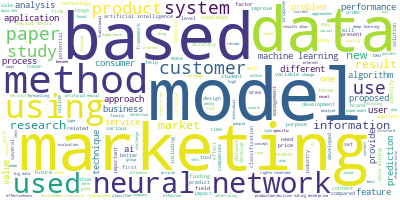

In [40]:
from wordcloud import WordCloud


long_string = ','.join(list(df['description'].values))
#print(long_string[1:100])

wordcloud = WordCloud(background_color = "white", max_words = 5000, contour_width = 3,
                     contour_color = 'steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

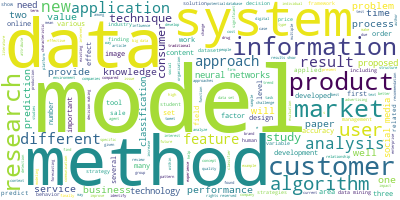

In [41]:
#This is the wordcloud without the keywords

REMOVE_LIST = ["artificial intelligence", "artifical", "intelligence", "machine", "learning", "machine learning",
              "marketing", "deep learning", "deep", "learning", "neural network", "nueral", "network", "AI", "based", "using",
              "used", "use"]

REMOVE_LIST = STOPWORDS.union(REMOVE_LIST)

remove = '|'.join(REMOVE_LIST)
    
regex = re.compile(r'\b('+remove+r')\b', flags=re.IGNORECASE)

out1= [regex.sub("", str(x)) for x in df['description']]

#print(out1[1])

wordcloud = WordCloud(background_color = "white", max_words = 5000, contour_width = 3,
                     contour_color = 'steelblue')

out = ','.join(list(out1))

wordcloud.generate(out)

wordcloud.to_image()

# LDA - unigram

In [42]:


out1 = df['description'].values #unigram

def sent_to_words(sentences):
    for sentence in sentences:
        #deacc = True -> removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc = True))

data_words = list(sent_to_words(out1))

data_words = remove_stopwords(data_words)

#print(data_words[:1][0][:30])

for i in range(len(data_words)):
    for j in range(len(data_words[i])):
        each1 = lemmatizer.lemmatize(data_words[i][j])
        data_words[i][j] = each1

In [43]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)

texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]


#print(corpus[:1][0][:30])

In [44]:
from pprint import pprint

num_topics = 15

lda_model = gensim.models.LdaMulticore(corpus = corpus, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every=1, chunksize = 100, 
                                      passes = 50, decay = 0.6)

lda_model.save('lda_model.model')

doc_lda = lda_model[corpus]


In [45]:
print(lda_model.print_topics(20, num_words = 20))

[(0, '0.031*"model" + 0.023*"network" + 0.017*"method" + 0.015*"neural" + 0.014*"data" + 0.011*"algorithm" + 0.010*"result" + 0.009*"performance" + 0.009*"used" + 0.008*"prediction" + 0.008*"problem" + 0.008*"based" + 0.008*"proposed" + 0.008*"marketing" + 0.007*"classification" + 0.007*"approach" + 0.007*"using" + 0.007*"decision" + 0.006*"learning" + 0.006*"paper"'), (1, '0.029*"drug" + 0.010*"data" + 0.009*"method" + 0.007*"event" + 0.006*"result" + 0.006*"report" + 0.006*"adverse" + 0.006*"learning" + 0.006*"marketing" + 0.006*"clinical" + 0.006*"safety" + 0.006*"study" + 0.005*"health" + 0.005*"information" + 0.005*"effect" + 0.005*"patient" + 0.005*"medical" + 0.004*"signal" + 0.004*"post" + 0.004*"student"'), (2, '0.023*"negotiation" + 0.016*"wine" + 0.011*"tomato" + 0.007*"ea" + 0.006*"use" + 0.006*"vehicle" + 0.006*"ripeness" + 0.006*"time" + 0.005*"agent" + 0.005*"silver" + 0.005*"cad" + 0.004*"forecaster" + 0.004*"work" + 0.004*"colloidal" + 0.004*"philosophy" + 0.004*"produ

In [46]:
#print(lda_model.print_topics(20, num_words = 15)[:10])

train_vecs = []
for i in range(len(df)):
    top_topics = (
        lda_model.get_document_topics(corpus[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec = [top_topics[i][1] for i in range(num_topics)]
    train_vecs.append(topic_vec)
    
print(len(train_vecs))


2033


In [47]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+str(num_topics) + '.html')

## This cell tries interaction term - I am still figuring it out.

In [48]:
df.citedby_count.describe()

df['y']=df.citedby_count>4
#print(df['y'])

df['year'] = df['coverDate'].astype(str).str[0:4]

df['year'] = df['year'].astype(int)

df.loc[df['year'] <2000,'coverDate'] = 0

df.loc[df['year'] > 2010,'coverDate'] = 2

df.loc[(df['year']>=2000) & (df['year'] <= 2010) ,'coverDate'] = 1
#a = np.array(df.coverDate.values.tolist())
#df['coverDate'] = np.where(a < '2000-1-1', 0, a).tolist()
#year

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Logistic Regression - Still need to add the sentiments

### X: Topic distribution per corpus, year, Sentiment, author publication score, first author's university rank, 

### y: citation number

### Things to do
* k-cv to choose the optimal topic numbers
* bigram
* interaction term

### Results

We see that a normal logistic model performs the best in terms of f1 score

* We can try other diagnostics.

y should be weighted because earlier publications usually dont have 
fair chance to be cited. Thus, we weight the y variable. 
Or, we should delete the publications published after 2020-6-1

For now, no logical methods is proposed. Thus, we restrict our sample size.

In [49]:
#logistic regression - unigram
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
import numpy as np

X = np.column_stack([train_vecs, df.coverDate, df.h_index_x])
y = np.array(df.y)


kf = KFold(10, shuffle = True, random_state = 42)

cv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1, = [], [], []

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)
    
    lr = LogisticRegression(
        class_weight = 'balanced',
        solver = 'saga',
        fit_intercept = True,
        max_iter = 10000
    ).fit(X_train_scale, y_train)
    
    
    y_pred = lr.predict(X_val_scale)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    sgd = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        loss='log',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd.predict(X_val_scale)
    cv_lrsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    # SGD Modified Huber
    sgd_huber = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        alpha=20,
        loss='modified_huber',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd_huber.predict(X_val_scale)
    cv_svcsgd_f1.append(f1_score(y_val, y_pred, average='binary'))

print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logisitic Regression SGD Val f1: {np.mean(cv_lrsgd_f1):.3f} +- {np.std(cv_lrsgd_f1):.3f}')
print(f'SVM Huber Val f1: {np.mean(cv_svcsgd_f1):.3f} +- {np.std(cv_svcsgd_f1):.3f}')

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:443: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:93: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and gu

Logistic Regression Val f1: 0.670 +- 0.038
Logisitic Regression SGD Val f1: 0.650 +- 0.055
SVM Huber Val f1: 0.403 +- 0.329


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:93: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https:/

#We create a handful of LDA models with different topic values, 
#then see how these perform in the supervised classification model training
#This is specific to our goal

 We can also run HDP, which seeks to learn the correct number of topics
 from the data, that is, you don't need to provide a fixed number of topics.
 In the end, we expect to run a basic logistic regression - to be done later

When topic = 20

Logistic Regression Val f1: 0.564 +- 0.045
Logisitic Regression SGD Val f1: 0.504 +- 0.067
SVM Huber Val f1: 0.462 +- 0.304
    
When topic = 15
Logistic Regression Val f1: 0.545 +- 0.047
Logisitic Regression SGD Val f1: 0.563 +- 0.049
SVM Huber Val f1: 0.402 +- 0.329
    
When topic = 10

Logistic Regression Val f1: 0.563 +- 0.047
Logisitic Regression SGD Val f1: 0.561 +- 0.090
SVM Huber Val f1: 0.401 +- 0.328
    
When topic = 5

Logistic Regression Val f1: 0.530 +- 0.037
Logisitic Regression SGD Val f1: 0.532 +- 0.066
SVM Huber Val f1: 0.393 +- 0.321
    





## LDA - bigram + trigram + logistic regression


In [50]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
corpus2 = remove_stopwords(corpus2)
dictionary2 = Dictionary(corpus2)
dictionary2.filter_extremes(no_below=20, no_above=0.5)
bi_corpus = [dictionary2.doc2bow(doc) for doc in corpus2]

num_topics = 20

temp = dictionary2[0]  # This is only to "load" the dictionary.

lda_model = gensim.models.LdaMulticore(corpus = bi_corpus, id2word = dictionary2, 
                                      num_topics = num_topics, workers = 7, eval_every = None,
                                    chunksize = 100, passes = 10, decay = 0.6)


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/lda_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, bi_corpus, dictionary2)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/lda_'+str(num_topics) + '.html')

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
train_vecs = []
for i in range(len(df)):
    top_topics = (
        lda_model.get_document_topics(bi_corpus[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec = [top_topics[i][1] for i in range(num_topics)]
    train_vecs.append(topic_vec)
    
print(len(train_vecs))


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2033


In [53]:
print(train_vecs)

[[0.26536855, 0.00050009496, 0.00050009496, 0.00050009496, 0.00050009496, 0.00050009496, 0.15132844, 0.00050009496, 0.00050009496, 0.00050009496, 0.03007368, 0.00050009496, 0.00050009496, 0.5452278, 0.00050009496, 0.00050009496, 0.00050009496, 0.00050009496, 0.00050009496, 0.00050009496], [0.11438413, 0.00078140065, 0.00078140065, 0.00078140065, 0.16990902, 0.00078140065, 0.00078140065, 0.00078140065, 0.26131973, 0.00078140065, 0.00078140065, 0.00078140065, 0.00078140065, 0.00078140065, 0.00078140065, 0.00078140065, 0.00078140065, 0.00078140065, 0.44188473, 0.00078140065], [0.03483693, 0.0009616725, 0.0009616725, 0.5062419, 0.0009616725, 0.0009616725, 0.24778819, 0.0009616725, 0.0009616725, 0.0009616725, 0.0009616725, 0.0009616725, 0.0009616725, 0.0009616725, 0.0009616725, 0.0009616725, 0.0009616725, 0.19574626, 0.0009616725, 0.0009616725], [0.00046304942, 0.13512686, 0.5076969, 0.00046304942, 0.00046304942, 0.1749856, 0.12975089, 0.00046304942, 0.045493938, 0.00046304942, 0.0004630494

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
#logistic regression - unigram
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
import numpy as np

X = np.column_stack([train_vecs, df.coverDate, df.h_index_x])
y = np.array(df.y)


kf = KFold(10, shuffle = True, random_state = 42)

lr_score , lrsgd_score, svcsgd_score, cv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1, = [], [], [], [], [], []

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)
    
    lr = LogisticRegression(
        class_weight = 'balanced',
        solver = 'saga',
        fit_intercept = True,
        max_iter = 10000
    ).fit(X_train_scale, y_train)
    
    
    y_pred = lr.predict(X_val_scale)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    lr_score.append(lr.score(X_val, y_val))
    
    sgd = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        loss='log',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd.predict(X_val_scale)
    cv_lrsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    lrsgd_score.append(sgd.score(X_val, y_val))
    
    # SGD Modified Huber
    sgd_huber = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        alpha=20,
        loss='modified_huber',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd_huber.predict(X_val_scale)
    cv_svcsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    svcsgd_score.append(sgd_huber.score(X_val, y_val))

print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logisitic Regression SGD Val f1: {np.mean(cv_lrsgd_f1):.3f} +- {np.std(cv_lrsgd_f1):.3f}')
print(f'SVM Huber Val f1: {np.mean(cv_svcsgd_f1):.3f} +- {np.std(cv_svcsgd_f1):.3f}')

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:443: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

Logistic Regression Val f1: 0.678 +- 0.034
Logisitic Regression SGD Val f1: 0.631 +- 0.025
SVM Huber Val f1: 0.269 +- 0.326


C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:93: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and gu

In [55]:
print(f'Logistic Regression Accuracy:{np.mean(lr_score)}')
print(f'Logistic Regression SGD Accuracy:{np.mean(lrsgd_score)}')
print(f'SVM Huber Accuracy:{np.mean(svcsgd_score)}')

Logistic Regression Accuracy:0.5804090601757944
Logistic Regression SGD Accuracy:0.5961315560707041
SVM Huber Accuracy:0.5975876557519559


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
lda_model.show_topic

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method LdaModel.show_topic of <gensim.models.ldamulticore.LdaMulticore object at 0x000001F8D8EA0070>>

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(1, [('data', 0.027974425), ('data_mining', 0.018774409), ('technique', 0.01488595), ('customer', 0.011558957), ('approach', 0.010703632), ('hotel', 0.00993321), ('research', 0.009313084), ('big_data', 0.008705114), ('analysis', 0.008547924), ('study', 0.008370124)]), (11, [('agent', 0.04821731), ('new_product', 0.025045102), ('based', 0.023649316), ('bidding', 0.016389467), ('market', 0.012905895), ('chemical', 0.012554398), ('development', 0.011629059), ('power', 0.01117283), ('smart', 0.010543853), ('drug', 0.010206073)]), (14, [('study', 0.019880356), ('factor', 0.016662214), ('model', 0.015545859), ('data', 0.012945687), ('based', 0.009973497), ('user', 0.008573928), ('perceived', 0.008271525), ('method', 0.008230251), ('using', 0.007752375), ('study_aim', 0.0071371123)]), (18, [('ai', 0.03322728), ('research', 0.02362691), ('digital', 0.022079151), ('consumer', 0.021100573), ('advertising', 0.012303857), ('technology', 0.0098813055), ('paper', 0.006964974), ('implication', 0.006

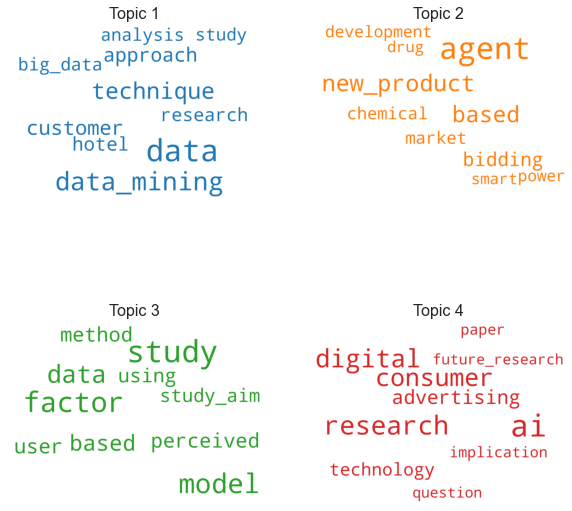

## LDA over time

### Firstly, we divide the data in 3 windows (~2000, ~2010 ~2020)

In [69]:
from pprint import pprint

num_topics = 5

inc = df.coverDate == 0
inc.astype(int)

corpus0 = [x for x, y in zip(corpus2, inc) if y == 1]
id2word = Dictionary(corpus0)
corpus0 = [dictionary2.doc2bow(doc) for doc in corpus0]



lda_model0 = gensim.models.LdaMulticore(corpus = corpus0, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every= 10, chunksize = 10, 
                                      passes = 2,decay = 0.6)


lda_model0.save('lda_model0.model')

print(lda_model0.print_topics(10, num_words = 15)[:10])

doc_lda0 = lda_model0[corpus0]


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.016*"early" + 0.012*"simple" + 0.011*"support" + 0.010*"qualitatively" + 0.008*"equivalent" + 0.007*"ai" + 0.007*"trading" + 0.007*"system" + 0.006*"historical" + 0.006*"leading" + 0.006*"price" + 0.005*"bse" + 0.005*"strategic" + 0.005*"frontier" + 0.005*"data"'), (1, '0.024*"equivalent" + 0.012*"leading" + 0.007*"simple" + 0.007*"data" + 0.006*"important" + 0.006*"system" + 0.006*"frontier" + 0.006*"segment" + 0.006*"right_reserved" + 0.005*"anns" + 0.005*"qualitatively" + 0.005*"shown" + 0.005*"io" + 0.005*"arma" + 0.005*"student"'), (2, '0.021*"simple" + 0.013*"data" + 0.011*"leading" + 0.010*"equivalent" + 0.009*"boundary" + 0.007*"strategic" + 0.007*"qualitatively" + 0.007*"anns" + 0.006*"global" + 0.006*"important" + 0.006*"ai" + 0.006*"event" + 0.005*"information" + 0.005*"able" + 0.005*"trading"'), (3, '0.020*"adjusted" + 0.018*"qualitatively" + 0.013*"leading" + 0.011*"equivalent" + 0.011*"frontier" + 0.008*"shown" + 0.007*"slightly" + 0.007*"student" + 0.006*"perform

In [70]:
#~2000


train_vecs0 = []
for i in range(len(corpus0)):
    top_topics0 = (
        lda_model0.get_document_topics(corpus0[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec0 = [top_topics0[i][1] for i in range(num_topics)]
    train_vecs0.append(topic_vec0)

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis0_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model0, corpus0, id2word)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis0_prepared_'+str(num_topics) + '.html')

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [71]:
#~2010

from pprint import pprint

num_topics = 10

inc = df.coverDate == 1
inc.astype(int)

corpus1 = [x for x, y in zip(corpus2, inc) if y == 1]
id2word = Dictionary(corpus1)
corpus1 = [dictionary2.doc2bow(doc) for doc in corpus1]



lda_model1 = gensim.models.LdaMulticore(corpus = corpus1, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every= 10, chunksize = 10, 
                                      passes = 2,decay = 0.6)


lda_model1.save('lda_model1.model')

print(lda_model1.print_topics(10, num_words = 15)[:10])

doc_lda1 = lda_model1[corpus1]


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.018*"relate" + 0.015*"case_study" + 0.012*"generation" + 0.011*"statistic" + 0.010*"incorporating" + 0.009*"today" + 0.009*"using" + 0.007*"gaining" + 0.007*"learning" + 0.007*"type" + 0.007*"past" + 0.006*"scalable" + 0.006*"strategic" + 0.006*"albeit" + 0.006*"see"'), (1, '0.014*"generation" + 0.009*"strategic" + 0.009*"explore" + 0.008*"issue" + 0.008*"effective" + 0.008*"learning" + 0.007*"scenario" + 0.007*"analysed" + 0.007*"relate" + 0.007*"little" + 0.006*"content" + 0.006*"using" + 0.006*"case_study" + 0.006*"bi" + 0.005*"type"'), (2, '0.016*"promoted" + 0.011*"today" + 0.011*"relate" + 0.009*"policy" + 0.009*"consists" + 0.009*"using" + 0.008*"gaining" + 0.008*"generation" + 0.008*"explore" + 0.007*"case_study" + 0.007*"incorporating" + 0.007*"statistic" + 0.007*"issue" + 0.007*"strategic" + 0.007*"interest"'), (3, '0.031*"occurrence" + 0.019*"today" + 0.017*"consists" + 0.013*"using" + 0.010*"relate" + 0.009*"enhanced" + 0.008*"appear" + 0.008*"learning" + 0.008*"inc

In [72]:

train_vecs1 = []

for i in range(len(corpus1)):
    top_topics1 = (
        lda_model1.get_document_topics(corpus1[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec1 = [top_topics1[i][1] for i in range(num_topics)]
    train_vecs1.append(topic_vec1)

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis1_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model1, corpus1, id2word)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis1_prepared_'+str(num_topics) + '.html')

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
LDAvis_prepared

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.063714  0.083556       1        1  29.633891
6     -0.037259  0.073872       2        1  23.028490
3     -0.061139  0.058623       3        1  10.353351
8     -0.120058 -0.058273       4        1   8.973685
2     -0.069033 -0.001312       5        1   7.896759
5      0.034329  0.070473       6        1   6.953781
0      0.010078 -0.053091       7        1   4.410120
9      0.088588 -0.054069       8        1   3.745989
1     -0.049702 -0.071818       9        1   3.089322
4      0.140482 -0.047961      10        1   1.914613, topic_info=             Term        Freq        Total Category  logprob  loglift
1097     position  198.000000   198.000000  Default  30.0000  30.0000
65      parameter  661.000000   661.000000  Default  29.0000  29.0000
213        assist  439.000000   439.000000  Default  28.0000  28.0000
209         value  428.000000   428.000000  Default  27.0000  27.0000
243        highly  648.000000   648.000000  Default  26.0000  26.0000
...           ...         ...          ...      ...      ...      ...
376   effectively   12.157471   345.424306  Topic10  -5.3112   0.6088
131       mediate   12.262850   449.206026  Topic10  -5.3026   0.3547
184   highlighted   13.156007  1554.764354  Topic10  -5.2323  -0.8165
151        sample   11.140787   281.310335  Topic10  -5.3985   0.7268
35        finding   11.090067  1029.955472  Topic10  -5.4031  -0.5756

[645 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1111      1  0.273956       absolute
1111      6  0.657495       absolute
1111      7  0.054791       absolute
914       1  0.069743  acceptability
914       3  0.139486  acceptability
...     ...       ...            ...
105       6  0.104611          yield
105       7  0.023247          yield
105       8  0.017435          yield
105       9  0.040682          yield
105      10  0.087176          yield

[2420 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 7, 4, 9, 3, 6, 1, 10, 2, 5])

In [73]:
#~2020

#~2010

from pprint import pprint

num_topics = 10

inc = df.coverDate == 2
inc.astype(int)

corpus3 = [x for x, y in zip(corpus2, inc) if y == 1]
id2word = Dictionary(corpus3)
corpus3 = [dictionary2.doc2bow(doc) for doc in corpus3]



lda_model2 = gensim.models.LdaMulticore(corpus = corpus3, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every= 10, chunksize = 10, 
                                      passes = 2,decay = 0.6)


lda_model2.save('lda_model2.model')

print(lda_model2.print_topics(10, num_words = 15)[:10])

doc_lda2 = lda_model2[corpus1]


train_vecs2 = []
for i in range(len(corpus3)):
    top_topics2 = (
        lda_model2.get_document_topics(corpus3[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec2 = [top_topics2[i][1] for i in range(num_topics)]
    train_vecs2.append(topic_vec2)

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis2_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model2, corpus3, id2word)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis2_prepared_'+str(num_topics) + '.html')

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, '0.011*"pharmaceutical" + 0.010*"political" + 0.010*"social_medium" + 0.009*"engagement" + 0.008*"predicting" + 0.008*"increasingly" + 0.007*"sufficiently" + 0.006*"strategy" + 0.006*"expressing" + 0.006*"parameter" + 0.006*"race" + 0.006*"aim" + 0.006*"manuscript" + 0.006*"ranging" + 0.006*"recognition"'), (1, '0.016*"assist" + 0.014*"optimized" + 0.011*"judge" + 0.009*"broadcast" + 0.008*"questionnaire" + 0.007*"optimize" + 0.007*"result_showed" + 0.007*"given" + 0.007*"grown" + 0.007*"objective" + 0.007*"manager" + 0.007*"intelligent" + 0.006*"required" + 0.006*"kiwifruit" + 0.006*"predicting"'), (2, '0.017*"analysis" + 0.013*"virtual" + 0.013*"movement" + 0.010*"using" + 0.009*"optimized" + 0.009*"way" + 0.008*"automated" + 0.008*"questionnaire" + 0.007*"peer" + 0.007*"highlighted" + 0.007*"agriculture" + 0.007*"listing" + 0.007*"incubation" + 0.006*"screen" + 0.006*"intelligent"'), (3, '0.013*"value" + 0.012*"build" + 0.011*"highlighted" + 0.011*"feature" + 0.010*"intelligent

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


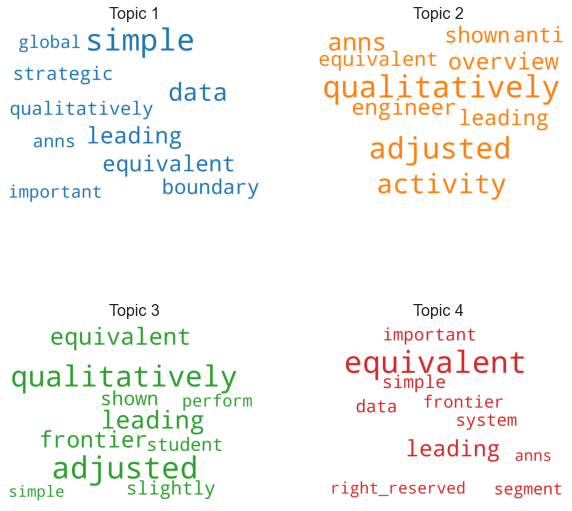

In [102]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)


topics = lda_model0.show_topics(formatted=False, num_topics=4)
fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')

In [83]:
inc = df.coverDate == 2
print(sum(inc))

1373


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
